<a href="https://colab.research.google.com/github/bbazargani/BU/blob/main/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# prompt: upload csv

from google.colab import files
uploaded = files.upload()


Saving final.csv to final.csv


In [54]:
# prompt: count rows

import io
import pandas as pd

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  df = pd.read_csv(io.BytesIO(uploaded[fn]))
  print(f"Number of rows: {len(df)}")


User uploaded file "final.csv" with length 2723 bytes
Number of rows: 100


In [55]:
# prompt: average and standard deviation of Study_Hours, Test_Score, Absences, Homework_Completion

# Assuming 'df' is your DataFrame loaded from the uploaded CSV file.

# Calculate the average and standard deviation for the specified columns
for column in ['Study_Hours', 'Test_Score', 'Absences', 'Homework_Completion']:
  if column in df.columns:
    average = df[column].mean()
    std_dev = df[column].std()
    print(f"Column: {column}")
    print(f"  Average: {average}")
    print(f"  Standard Deviation: {std_dev}")
  else:
    print(f"Warning: Column '{column}' not found in the DataFrame.")



Column: Study_Hours
  Average: 6.73
  Standard Deviation: 2.530041721219457
Column: Test_Score
  Average: 69.05
  Standard Deviation: 14.087299961384375
Column: Absences
  Average: 4.5
  Standard Deviation: 3.1253282655869556
Column: Homework_Completion
  Average: 76.6
  Standard Deviation: 13.86660839148594


In [56]:
# prompt: count Extracurriculars

if 'Extracurriculars' in df.columns:
  extracurricular_counts = df['Extracurriculars'].value_counts()
  print("\nExtracurricular Activity Counts:")
  print(extracurricular_counts)
else:
  print("Warning: Column 'Extracurriculars' not found in the DataFrame.")



Extracurricular Activity Counts:
Extracurriculars
No     57
Yes    43
Name: count, dtype: int64


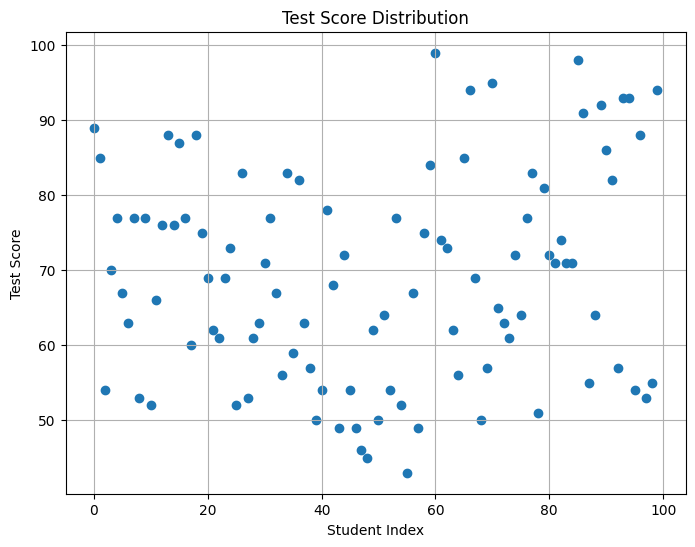

In [57]:
# prompt: scatter plot Test_Score distribution

import matplotlib.pyplot as plt

if 'Test_Score' in df.columns:
  plt.figure(figsize=(8, 6))
  plt.scatter(df.index, df['Test_Score'])
  plt.xlabel('Student Index')
  plt.ylabel('Test Score')
  plt.title('Test Score Distribution')
  plt.grid(True)
  plt.show()
else:
  print("Warning: Column 'Test_Score' not found in the DataFrame.")


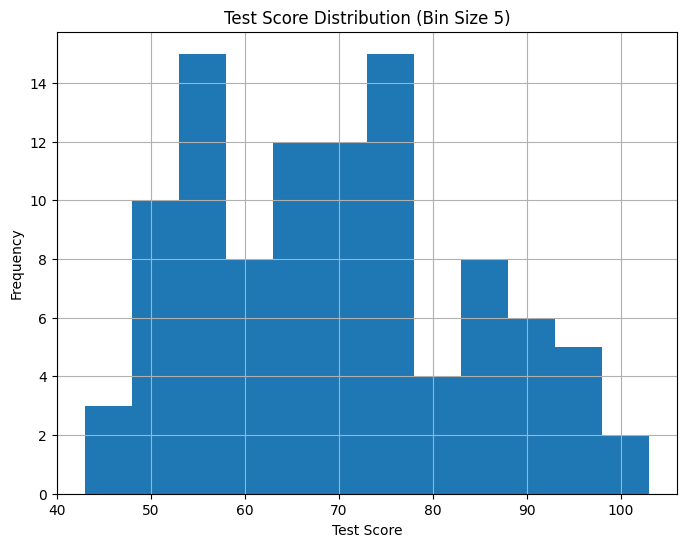

In [58]:
# prompt: scatter plot Test_Score distribution with bin size of 5

if 'Test_Score' in df.columns:
  plt.figure(figsize=(8, 6))
  plt.hist(df['Test_Score'], bins=range(min(df['Test_Score']), max(df['Test_Score']) + 5, 5))
  plt.xlabel('Test Score')
  plt.ylabel('Frequency')
  plt.title('Test Score Distribution (Bin Size 5)')
  plt.grid(True)
  plt.show()
else:
  print("Warning: Column 'Test_Score' not found in the DataFrame.")


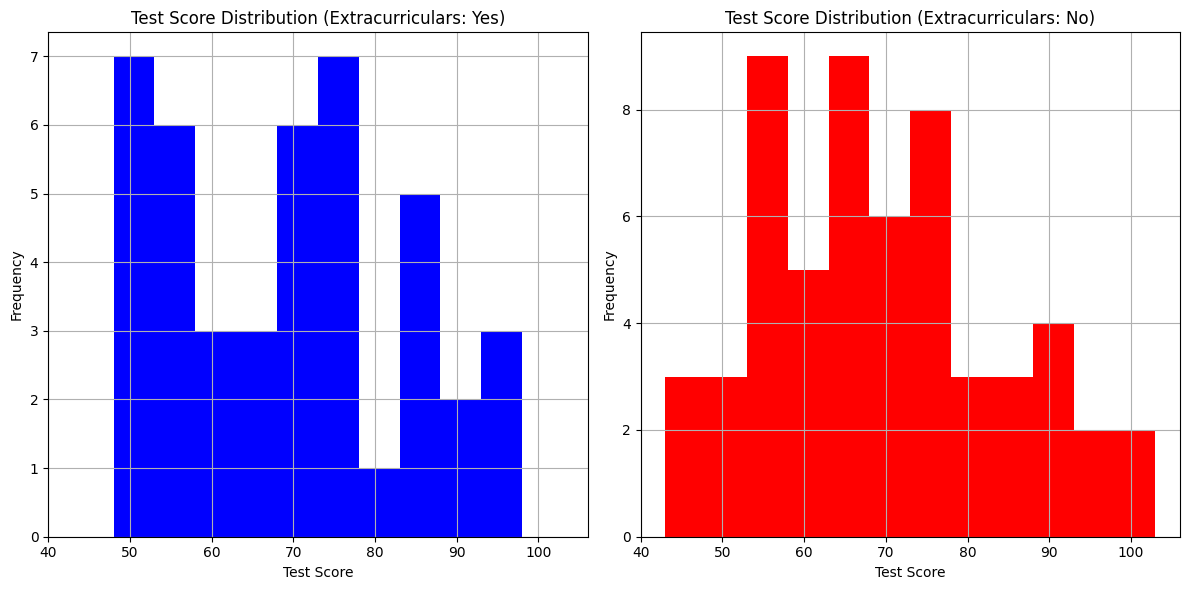

In [59]:
# prompt: plot Test_Score distribution with bin size of 5 and add Extracurricular as a color make it two separate charts one for Yes one for No

if 'Test_Score' in df.columns and 'Extracurriculars' in df.columns:
  df_yes = df[df['Extracurriculars'] == 'Yes']
  df_no = df[df['Extracurriculars'] == 'No']

  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.hist(df_yes['Test_Score'], bins=range(min(df['Test_Score']), max(df['Test_Score']) + 5, 5), color='blue')
  plt.xlabel('Test Score')
  plt.ylabel('Frequency')
  plt.title('Test Score Distribution (Extracurriculars: Yes)')
  plt.grid(True)

  plt.subplot(1, 2, 2)
  plt.hist(df_no['Test_Score'], bins=range(min(df['Test_Score']), max(df['Test_Score']) + 5, 5), color='red')
  plt.xlabel('Test Score')
  plt.ylabel('Frequency')
  plt.title('Test Score Distribution (Extracurriculars: No)')
  plt.grid(True)

  plt.tight_layout()
  plt.show()
else:
  print("Warning: Column 'Test_Score' or 'Extracurriculars' not found in the DataFrame.")


#Hypothesis #1 Extracurricular doesn't have any impact on student's performance

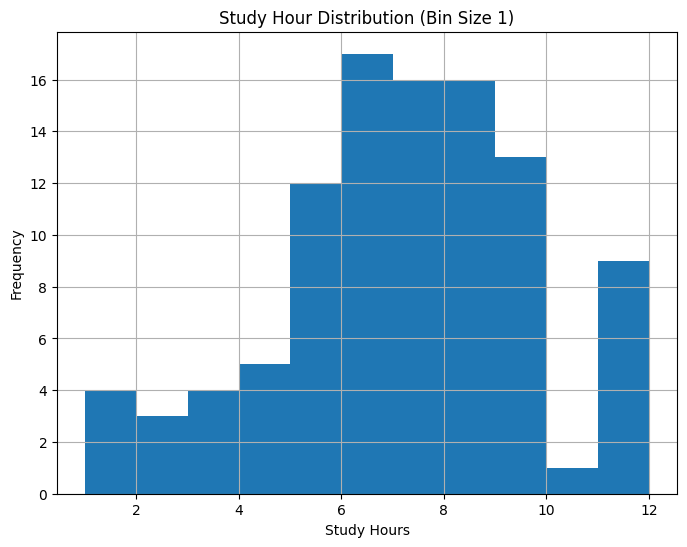

In [60]:
# prompt: plot Study_Hour distribution bin size 1

if 'Study_Hours' in df.columns:
  plt.figure(figsize=(8, 6))
  plt.hist(df['Study_Hours'], bins=range(min(df['Study_Hours']), max(df['Study_Hours']) + 1, 1))
  plt.xlabel('Study Hours')
  plt.ylabel('Frequency')
  plt.title('Study Hour Distribution (Bin Size 1)')
  plt.grid(True)
  plt.show()
else:
  print("Warning: Column 'Study_Hours' not found in the DataFrame.")


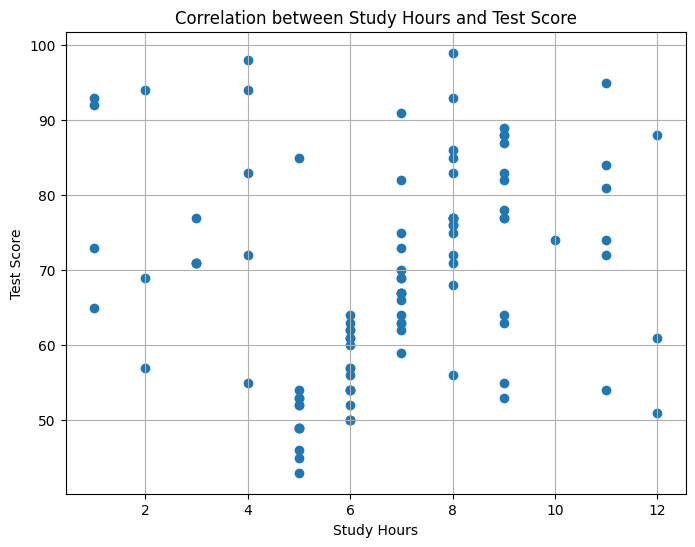

In [64]:
# prompt: plot Study_Hour and Test_Score to show their correlation

if 'Study_Hours' in df.columns and 'Test_Score' in df.columns:
  plt.figure(figsize=(8, 6))
  plt.scatter(df['Study_Hours'], df['Test_Score'])
  plt.xlabel('Study Hours')
  plt.ylabel('Test Score')
  plt.title('Correlation between Study Hours and Test Score')
  plt.grid(True)
  plt.show()
else:
  print("Warning: Column 'Study_Hours' or 'Test_Score' not found in the DataFrame.")


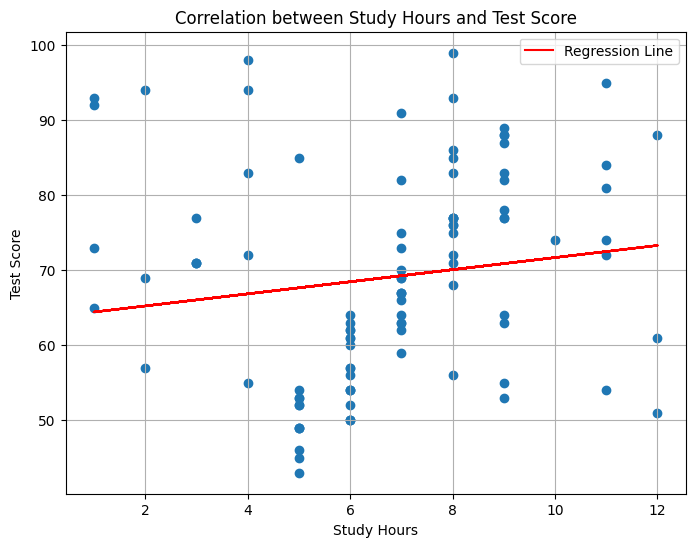

In [65]:
# prompt: draw a line in the chart above

if 'Study_Hours' in df.columns and 'Test_Score' in df.columns:
  plt.figure(figsize=(8, 6))
  plt.scatter(df['Study_Hours'], df['Test_Score'])
  plt.xlabel('Study Hours')
  plt.ylabel('Test Score')
  plt.title('Correlation between Study Hours and Test Score')
  plt.grid(True)

  # Calculate a simple linear regression line (you can use more advanced methods if needed)
  m, b = 0, 0  # Placeholder for slope and intercept
  if len(df['Study_Hours']) > 1:
      m = (df['Test_Score'].cov(df['Study_Hours']) / df['Study_Hours'].var())
      b = df['Test_Score'].mean() - m * df['Study_Hours'].mean()

  # Plot the regression line
  plt.plot(df['Study_Hours'], m * df['Study_Hours'] + b, color='red', label='Regression Line')

  plt.legend()
  plt.show()
else:
  print("Warning: Column 'Study_Hours' or 'Test_Score' not found in the DataFrame.")


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


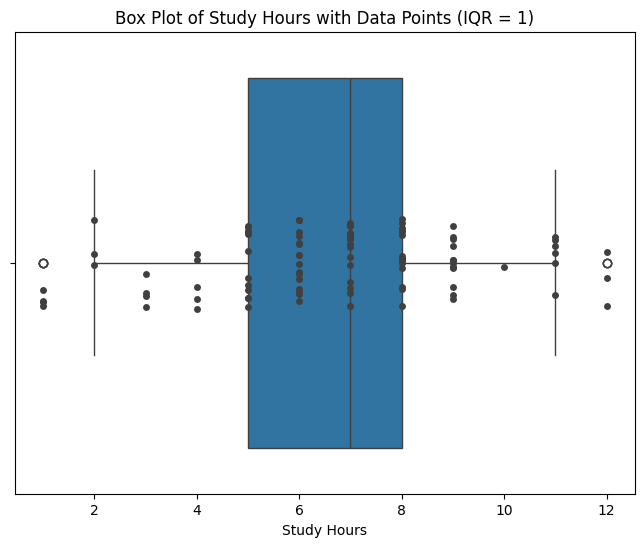

In [82]:
# prompt: create a box plot on Study_Hour showing the data points in the form of dots change the interquartile range from 1.5 to 1

if 'Study_Hours' in df.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df['Study_Hours'], whis=1)  # Change whis to 1 for IQR of 1
  sns.stripplot(x=df['Study_Hours'], color=".25")  # Show data points as dots
  plt.xlabel('Study Hours')
  plt.title('Box Plot of Study Hours with Data Points (IQR = 1)')
  plt.show()
else:
  print("Warning: Column 'Study_Hours' not found in the DataFrame.")


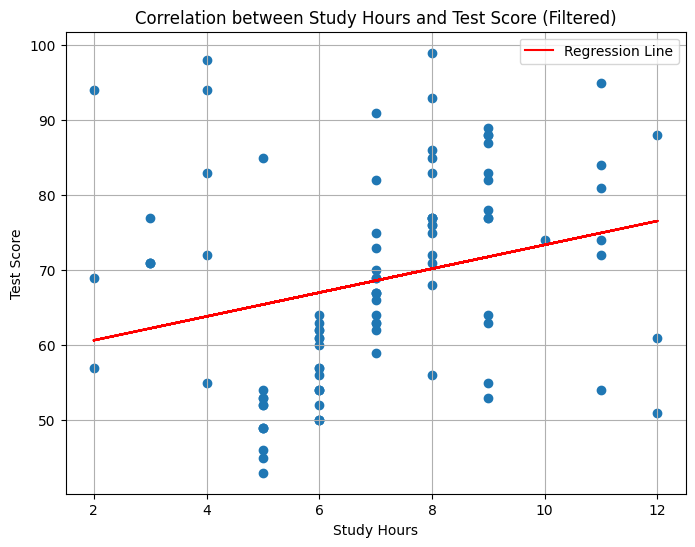

In [69]:
# prompt: draw the same chart excluding the Study_Hours data points that deviate 2 standard deviations from their median

if 'Study_Hours' in df.columns and 'Test_Score' in df.columns:
  median_study_hours = df['Study_Hours'].median()
  std_study_hours = df['Study_Hours'].std()

  # Filter out data points that deviate more than 2 standard deviations from the median
  df_filtered = df[
      (df['Study_Hours'] >= median_study_hours - 2 * std_study_hours) &
      (df['Study_Hours'] <= median_study_hours + 2 * std_study_hours)
  ]

  plt.figure(figsize=(8, 6))
  plt.scatter(df_filtered['Study_Hours'], df_filtered['Test_Score'])
  plt.xlabel('Study Hours')
  plt.ylabel('Test Score')
  plt.title('Correlation between Study Hours and Test Score (Filtered)')
  plt.grid(True)

  # Calculate a simple linear regression line (you can use more advanced methods if needed)
  m, b = 0, 0  # Placeholder for slope and intercept
  if len(df_filtered['Study_Hours']) > 1:
      m = (df_filtered['Test_Score'].cov(df_filtered['Study_Hours']) / df_filtered['Study_Hours'].var())
      b = df_filtered['Test_Score'].mean() - m * df_filtered['Study_Hours'].mean()

  # Plot the regression line
  plt.plot(df_filtered['Study_Hours'], m * df_filtered['Study_Hours'] + b, color='red', label='Regression Line')

  plt.legend()
  plt.show()
else:
  print("Warning: Column 'Study_Hours' or 'Test_Score' not found in the DataFrame.")


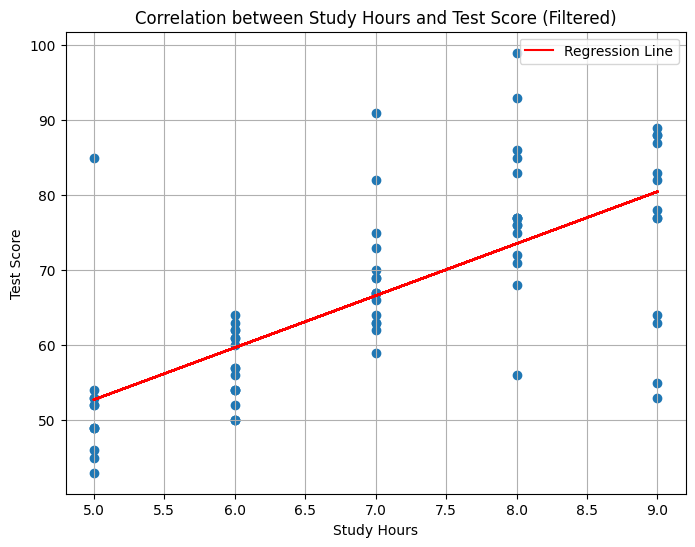

In [71]:
# prompt: draw the same chart excluding the Study_Hours data points that deviate 1 standard deviations from their median

if 'Study_Hours' in df.columns and 'Test_Score' in df.columns:
  median_study_hours = df['Study_Hours'].median()
  std_study_hours = df['Study_Hours'].std()

  # Filter out data points that deviate more than 1 standard deviations from the median
  df_filtered = df[
      (df['Study_Hours'] >= median_study_hours - 1 * std_study_hours) &
      (df['Study_Hours'] <= median_study_hours + 1 * std_study_hours)
  ]

  plt.figure(figsize=(8, 6))
  plt.scatter(df_filtered['Study_Hours'], df_filtered['Test_Score'])
  plt.xlabel('Study Hours')
  plt.ylabel('Test Score')
  plt.title('Correlation between Study Hours and Test Score (Filtered)')
  plt.grid(True)

  # Calculate a simple linear regression line (you can use more advanced methods if needed)
  m, b = 0, 0  # Placeholder for slope and intercept
  if len(df_filtered['Study_Hours']) > 1:
      m = (df_filtered['Test_Score'].cov(df_filtered['Study_Hours']) / df_filtered['Study_Hours'].var())
      b = df_filtered['Test_Score'].mean() - m * df_filtered['Study_Hours'].mean()

  # Plot the regression line
  plt.plot(df_filtered['Study_Hours'], m * df_filtered['Study_Hours'] + b, color='red', label='Regression Line')

  plt.legend()
  plt.show()
else:
  print("Warning: Column 'Study_Hours' or 'Test_Score' not found in the DataFrame.")


#Hypothesis #2: The more hours you study the better scores you get

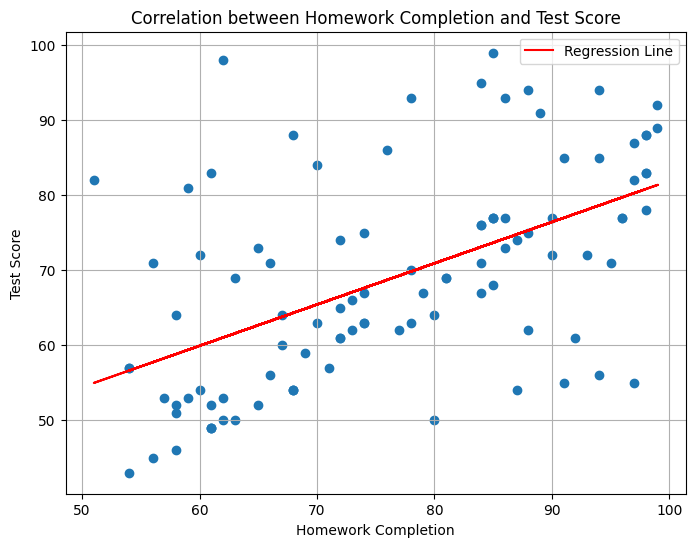

In [73]:
# prompt: do the same for Homework_Completion vs Test_Score just the plot with line including all data

if 'Homework_Completion' in df.columns and 'Test_Score' in df.columns:
  plt.figure(figsize=(8, 6))
  plt.scatter(df['Homework_Completion'], df['Test_Score'])
  plt.xlabel('Homework Completion')
  plt.ylabel('Test Score')
  plt.title('Correlation between Homework Completion and Test Score')
  plt.grid(True)

  # Calculate a simple linear regression line (you can use more advanced methods if needed)
  m, b = 0, 0  # Placeholder for slope and intercept
  if len(df['Homework_Completion']) > 1:
      m = (df['Test_Score'].cov(df['Homework_Completion']) / df['Homework_Completion'].var())
      b = df['Test_Score'].mean() - m * df['Homework_Completion'].mean()

  # Plot the regression line
  plt.plot(df['Homework_Completion'], m * df['Homework_Completion'] + b, color='red', label='Regression Line')

  plt.legend()
  plt.show()
else:
  print("Warning: Column 'Homework_Completion' or 'Test_Score' not found in the DataFrame.")


#Hypothesis #3: Better homework completion gives you better scores

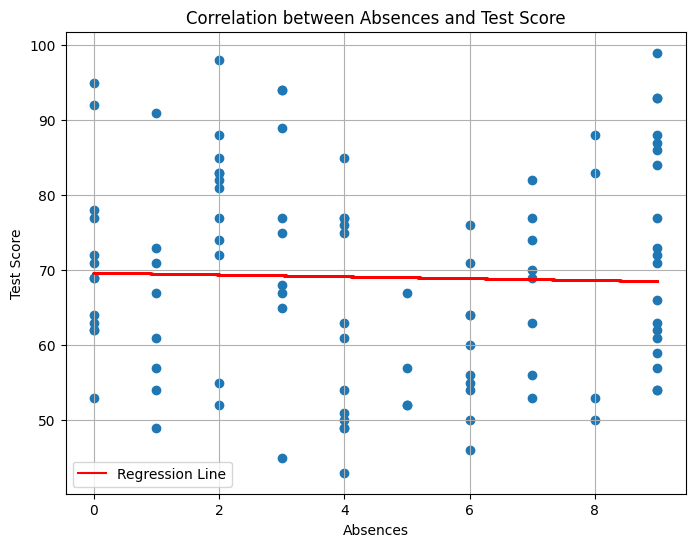

In [86]:
# prompt: do the same as above for Absences

if 'Absences' in df.columns and 'Test_Score' in df.columns:
  plt.figure(figsize=(8, 6))
  plt.scatter(df['Absences'], df['Test_Score'])
  plt.xlabel('Absences')
  plt.ylabel('Test Score')
  plt.title('Correlation between Absences and Test Score')
  plt.grid(True)

  # Calculate a simple linear regression line (you can use more advanced methods if needed)
  m, b = 0, 0  # Placeholder for slope and intercept
  if len(df['Absences']) > 1:
      m = (df['Test_Score'].cov(df['Absences']) / df['Absences'].var())
      b = df['Test_Score'].mean() - m * df['Absences'].mean()

  # Plot the regression line
  plt.plot(df['Absences'], m * df['Absences'] + b, color='red', label='Regression Line')

  plt.legend()
  plt.show()
else:
  print("Warning: Column 'Absences' or 'Test_Score' not found in the DataFrame.")

# #Hypothesis #4: More absences reduces the scores


#Hypothesis #4: Absence doesn't have any affect on your scores.